In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the dataset
file_path = r"D:\DS\Decision Tree\heart_disease.xlsx"
df = pd.read_excel(file_path, sheet_name='Heart_disease') 
# Display the column names to verify
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


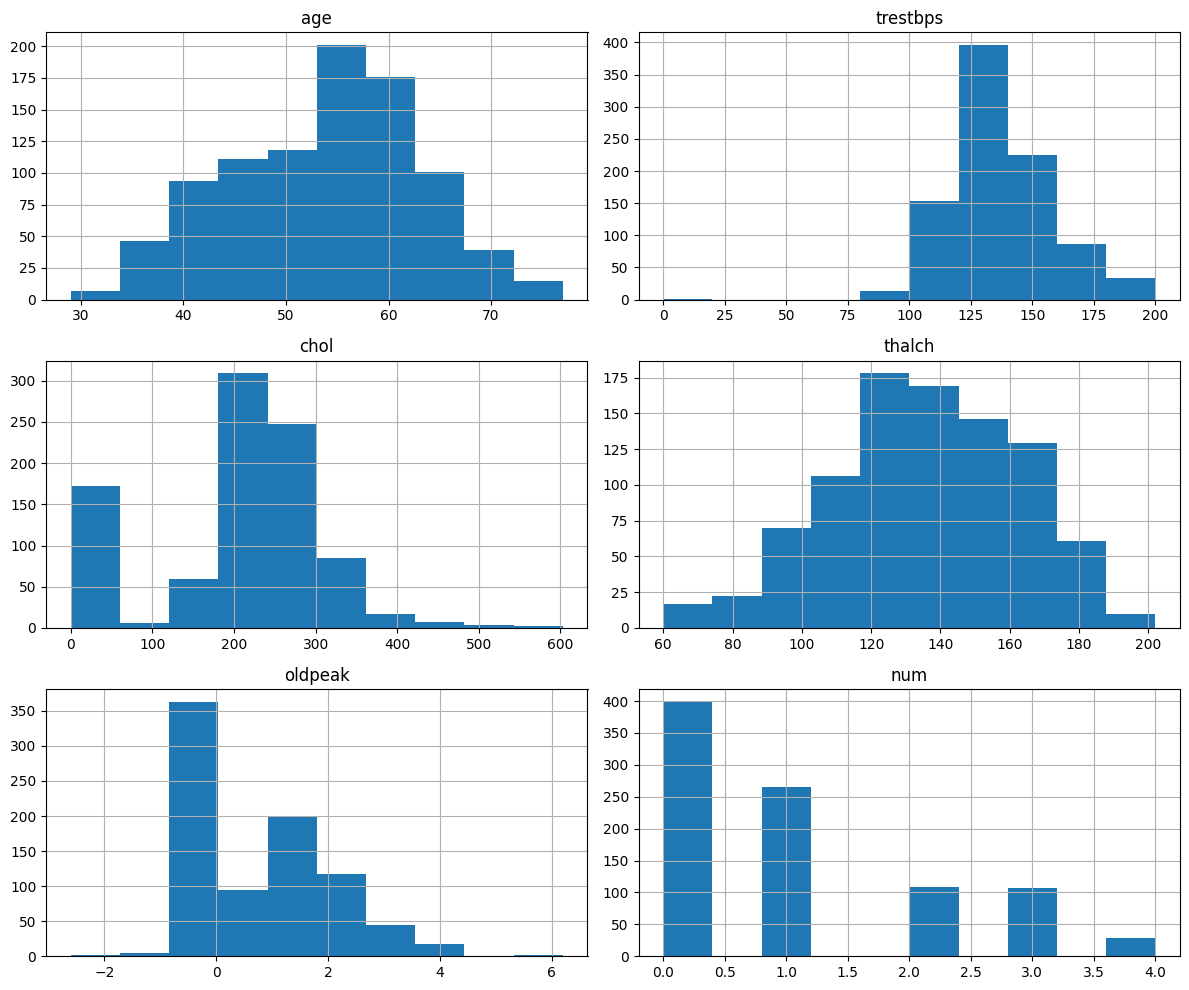

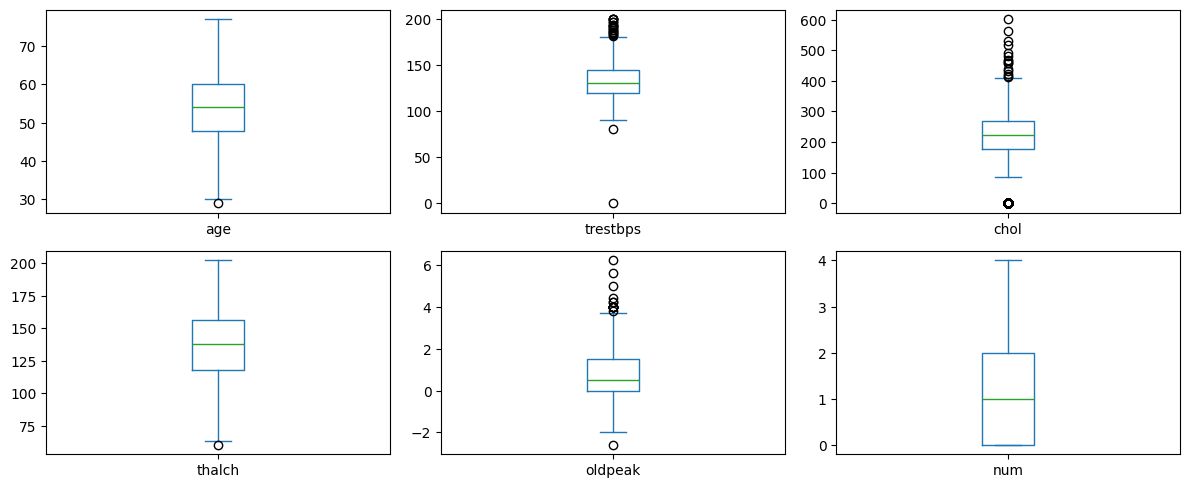

Missing Values After Filling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


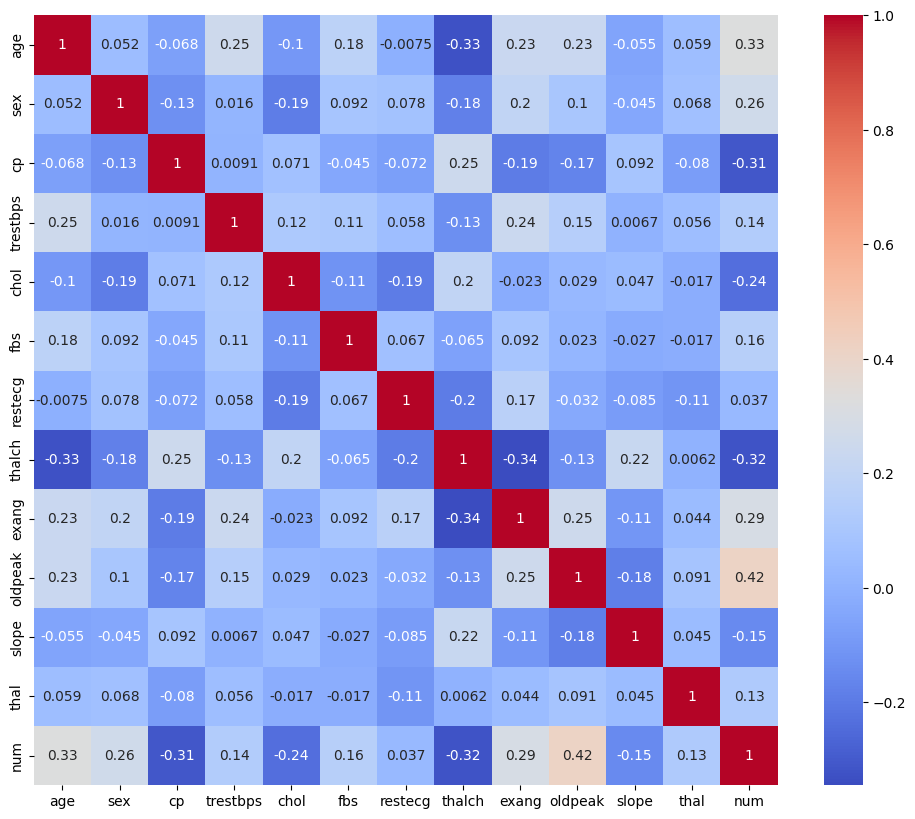

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize the distribution of numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots to visualize outliers
df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(12, 12))
plt.tight_layout()
plt.show()

# Convert necessary columns to numeric, handle non-numeric data
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Convert other categorical columns to numeric if needed
df['cp'] = df['cp'].astype('category').cat.codes

# Convert remaining categorical columns to numeric if necessary
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Select only numeric columns for missing value handling
numeric_cols = df.select_dtypes(include=['number']).columns

# Handle missing values for numeric columns (e.g., fill with mean or median)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify there are no missing values
print("Missing Values After Filling:\n", df.isnull().sum())

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [5]:
# Define the feature columns and target column
X = df.drop('num', axis=1)  # Assuming 'num' is the target column
y = df['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# ROC-AUC Score for multi-class
y_pred_prob = clf.predict_proba(X_test)
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))


Confusion Matrix:
[[66 16  4  1  2]
 [16 20  7  3  2]
 [ 4  7  4  6  1]
 [ 2  6  3  4  2]
 [ 1  2  1  2  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        89
           1       0.39      0.42      0.40        48
           2       0.21      0.18      0.20        22
           3       0.25      0.24      0.24        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.51      0.52      0.52       182


Accuracy Score:
0.5164835164835165

ROC-AUC Score:
0.5890446888300693


In [6]:
# Hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:\n", grid_search.best_params_)

# Best estimator
best_clf = grid_search.best_estimator_

# Make predictions with the best estimator
y_pred_best = best_clf.predict(X_test)

# Evaluate the best model
print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best, zero_division=0))

print("\nAccuracy Score (Best Model):")
print(accuracy_score(y_test, y_pred_best))

# ROC-AUC Score for multi-class (Best Model)
y_pred_prob_best = best_clf.predict_proba(X_test)
print("\nROC-AUC Score (Best Model):")
print(roc_auc_score(y_test, y_pred_prob_best, multi_class='ovr'))


Best Parameters:
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Confusion Matrix (Best Model):
[[67 17  3  2  0]
 [18 15  8  7  0]
 [ 3  8  6  5  0]
 [ 5  6  4  2  0]
 [ 0  2  2  2  0]]

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        89
           1       0.31      0.31      0.31        48
           2       0.26      0.27      0.27        22
           3       0.11      0.12      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.28      0.29      0.29       182
weighted avg       0.48      0.49      0.49       182


Accuracy Score (Best Model):
0.4945054945054945

ROC-AUC Score (Best Model):
0.6170693385058155


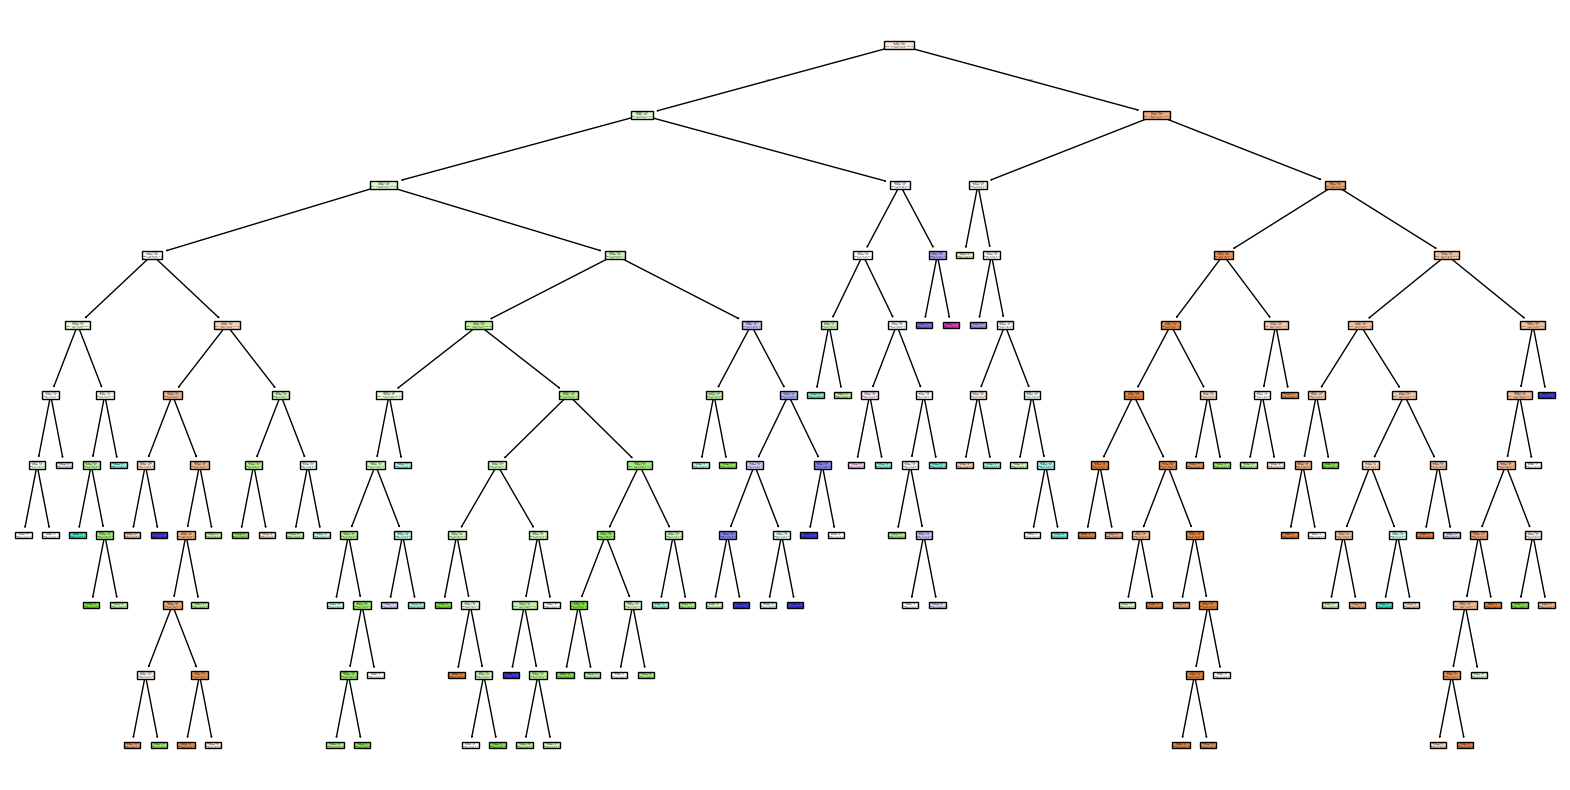

In [7]:
# Determine the number of unique classes in the target variable
unique_classes = y.unique()
class_names = [f"Class {i}" for i in unique_classes]

# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()


Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

   a.'criterion : Measures split quality (gini or entropy) affects tree steucture and feature importance
   b. max_depth : Limits tree depth to prevent overfitting Shallow trees may underfit , deep trees may overfit
   c. min_sample_split : Minimun sample to split a node higher values reduce overfitting
   d. min_sample_self : Minimum samples for a lead larger values smooth the model
   e. max_leaf_nodes : Maximum leaf nodes Limits complexity
       

2. What is the difference between the Label encoding and One-hot encoding?

   a,Lable Encoding : converts categorical data to numerical labels Exaple Red --> 0 , green --> 1 useful for ordinial data but can mislead with non-categories
   b.One-hot Encoding : conert categories to binary vectors Example Red --> [0,1] Green -->[0,1] prevents ordinal misinterpretation suitable for nominal data 